In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
from numpy.fft import fft2, fftshift, ifft2, ifftshift

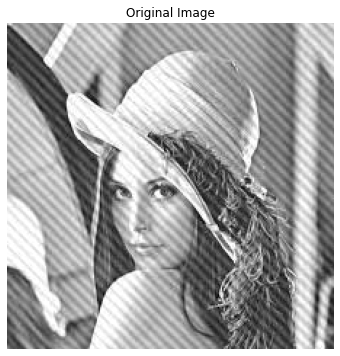

In [6]:
# noisy image
noisy_img = cv2.imread('noisy_lena.jpg', 0)

plt.figure(figsize = (10,6))
plt.imshow(noisy_img, cmap = 'gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

In [7]:
noisy_img.shape

(225, 225)

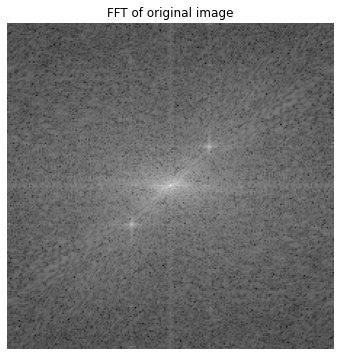

True

In [8]:
# transform image to fourier domain
F = fftshift(fft2(noisy_img))
S = np.log(1+np.absolute(F))

plt.figure(figsize = (10,6))
plt.imshow(S, cmap = 'gray')
plt.axis('off')
plt.title('FFT of original image')
plt.show()

cv2.imwrite('mask.png', S)

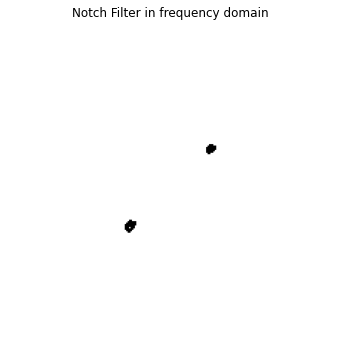

In [9]:
# notch filter generated in Paint
M = cv2.imread('edited_mask.png', 0)
M = M>0 
M = M.astype(np.float64)


# notch filter generation (Automatic)  -> works better
# N = F.shape[0]
# x, y = np.meshgrid(np.arange(N), np.arange(N))
# a1 = 0.008
# a2 = 0.008
# NF1 = 1 - np.exp(-a1*(x-139)**2 - a2*(y-86)**2) # Gaussian
# NF2 = 1 - np.exp(-a1*(x-86)**2 - a2*(y-139)**2) # Gaussian
# M = NF1*NF2

plt.figure(figsize = (10,6))
plt.imshow(np.log(1+np.absolute(M)), cmap = 'gray')
plt.axis('off')
plt.title('Notch Filter in frequency domain')
plt.show()

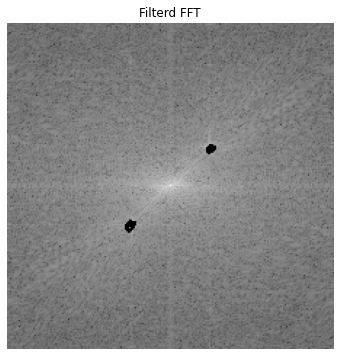

In [10]:
G = F*M

plt.figure(figsize = (10,6))
plt.imshow(np.log(1+np.absolute(G)), cmap = 'gray')
plt.axis('off')
plt.title('Filterd FFT')
plt.show()

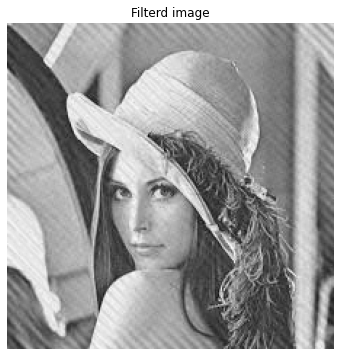

In [11]:
final_image = np.real(ifft2(ifftshift(G)))

plt.figure(figsize = (10,6))
plt.imshow(final_image, cmap = 'gray')
plt.axis('off')
plt.title('Filterd image')
plt.show()